<a href="https://colab.research.google.com/github/nirasha-nelki/SCS2204_Functional_Programming/blob/main/tasktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("student-mat.csv")

In [ ]:
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
ds.isnull().values.any()

False

In [ ]:
train_set, test_set=train_test_split(ds, test_size=0.2, random_state=42)

In [ ]:
train_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [ ]:
test_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


<ipython-input-1-4da4211168af>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})


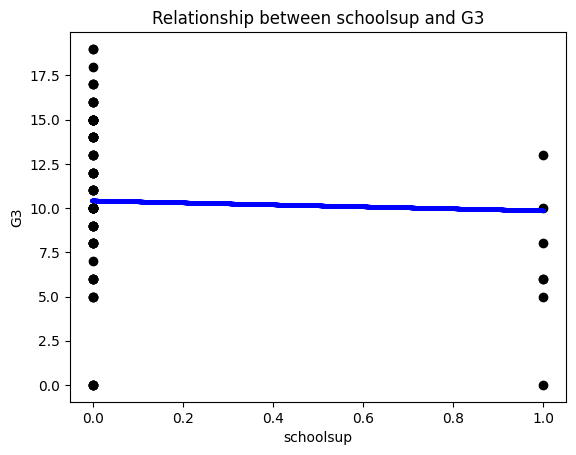

Coefficient: [-0.56350267]
Intercept: 10.404411764705882


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# Convert 'schoolsup' to numeric (if needed)
# You can use LabelEncoder or map 'yes' to 1 and 'no' to 0
data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})

# Split the data into features (X) and target variable (y)
X = data[['schoolsup']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'schoolsup' and 'G3'
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('schoolsup')
plt.ylabel('G3')
plt.title('Relationship between schoolsup and G3')
plt.show()

# Print the coefficients of the linear regression model
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)


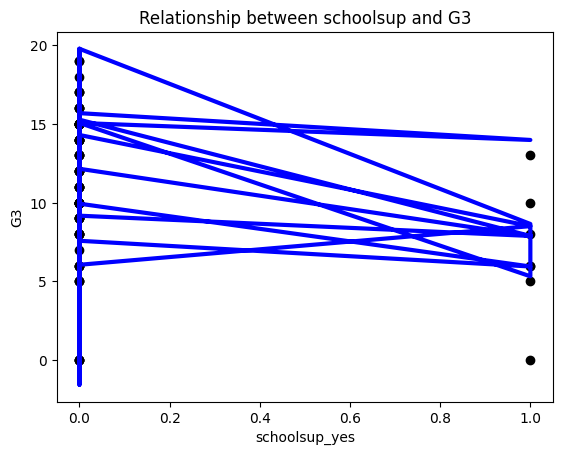

Coefficients: [0.20756163 0.96896175 0.85955367]
Intercept: -2.384401970140882


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# One-hot encode 'schoolsup'
data = pd.get_dummies(data, columns=['schoolsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'schoolsup' and 'G3'
plt.scatter(X_test['schoolsup_yes'], y_test, color='black')  # Assuming 'yes' indicates receiving school support
plt.plot(X_test['schoolsup_yes'], y_pred, color='blue', linewidth=3)
plt.xlabel('schoolsup_yes')
plt.ylabel('G3')
plt.title('Relationship between schoolsup and G3')
plt.show()

# Print the coefficients of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


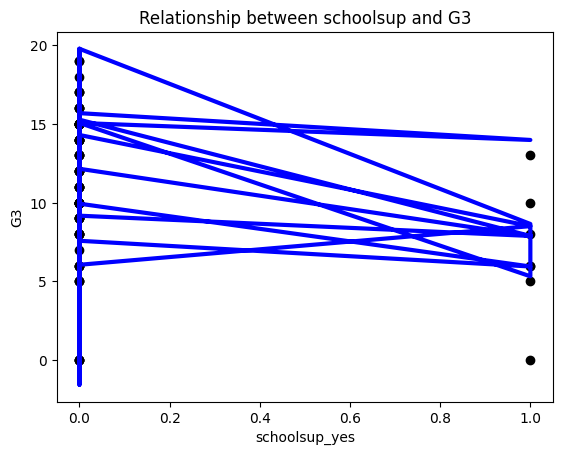

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# One-hot encode 'schoolsup'
data = pd.get_dummies(data, columns=['schoolsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the relationship between 'schoolsup' and 'G3'
plt.scatter(X_test['schoolsup_yes'], y_test, color='black')  # Assuming 'yes' indicates receiving school support
plt.plot(X_test['schoolsup_yes'], y_pred, color='blue', linewidth=3)
plt.xlabel('schoolsup_yes')
plt.ylabel('G3')
plt.title('Relationship between schoolsup and G3')
plt.show()

# Create a new data point for prediction
# new_data = {'schoolsup_yes': 1, 'G1': 15, 'G2': 16}
# new_data_df = pd.DataFrame([new_data])

X.head()

# Use the trained model to predict G3 for the new data point
# predicted_g3 = model.predict(new_data_df[['schoolsup_yes', 'G1', 'G2']])

# # Display the result
# print("Predicted G3 for a student with schoolsup_yes:", predicted_g3[0])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# One-hot encode 'schoolsup'
data = pd.get_dummies(data, columns=['schoolsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_test_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_test_pred)


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.88733869 12.14900177  3.08309165  7.99674677  8.20430839 12.70284026
 19.00058039  6.2663849   7.02778502 12.49527864 15.05588701  5.85126165
 13.67180201 11.52631689 14.29448689  8.51002357  6.05882327 10.55735514
 15.47101026  8.41187002 14.08692526 16.02484876 15.05588701  5.32673032
  8.64873881 19.76198051 10.55735514  8.96570852 17.40893376 10.55735514
  7.99674677  7.02778502 15.26344864 12.70284026  5.85126165  3.70577652
 -1.55415547 15.05588701 11.73387852  7.58162352  5.94941519  9.93467027
 14.08692526  8.20430839 15.67857189  9.58839339 11.52631689 14.29448689
 12.28771701 15.67857189 13.97751718 15.05588701 10.14223189  7.99674677
  3.70577652 12.28771701  9.79595502  5.64370002 15.2

[ 9.84  9.29 10.56 12.03 10.06  9.6  14.78 11.3   9.25 12.71 12.89 12.55
 11.55  9.6  11.06  9.99 10.83 10.26  8.49  6.46 12.72 10.85 10.65  9.16
 10.63 11.77 12.52 11.23 12.13 12.53 10.28 11.19 13.45 11.44 11.13  9.34
  1.49 12.54 12.39 10.12  8.76 11.25 12.18  9.49 11.73 12.37 10.71  9.38
 12.39 12.91  9.77 14.5  11.78 11.13 11.57 10.95 11.71  8.96 12.16 12.81
 13.28 11.46  9.41 12.73 10.3  10.57 10.36 10.85 11.07 11.57 10.64 11.25
 12.4  15.12  9.27 11.13 13.42 12.63  8.67]
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]


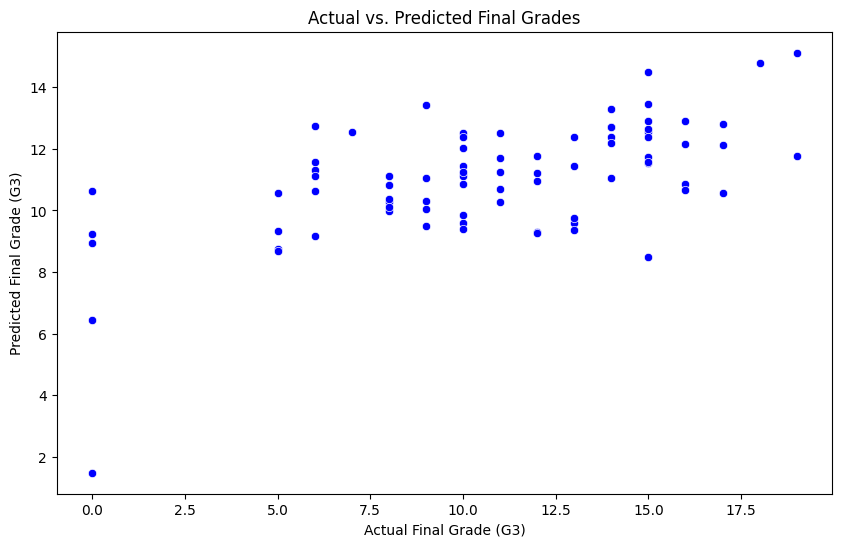

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Handle categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features (X) and target variable (y)
X = df.drop(['G1', 'G2', 'G3'], axis=1)  # Exclude G1, G2, G3 for simplicity
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)
print(y_test.values.tolist())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Actual vs. Predicted Final Grades')
plt.show()


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.72529887 12.66695281  2.52504174  8.20451194  8.20451194 12.66695281
 19.56345234  6.17612972  3.74207107 12.66695281 15.10101146  5.77045328
 13.88398214 10.63857059 14.69533502  9.13097532  6.58180617 10.63857059
 15.91236435  4.95910039 14.28965858 15.91236435 15.50668791  5.07421089
  4.66853445 19.96912878 10.63857059  9.42154127 17.53507012 10.23289415
  7.39315905  7.79883549 15.50668791 12.66695281  6.17612972  3.74207107
 -1.12604625 15.10101146 12.66695281  6.58180617  5.88556377  9.42154127
 14.28965858  8.20451194 16.31804079  9.82721771 11.04424704 14.28965858
 11.85559992 16.72371724 14.40476907 15.10101146 10.23289415  8.20451194
  4.14774751 11.44992348 10.63857059  2.52504174 15.9

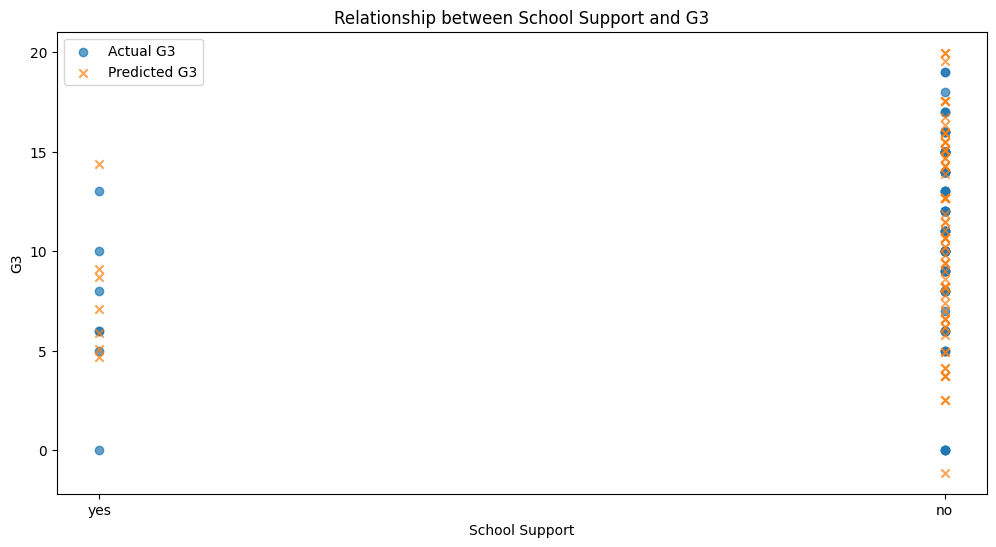

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'schoolsup'
data = pd.get_dummies(data, columns=['schoolsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'schoolsup_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'schoolsup' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'School Support': df.loc[X_test.index, 'schoolsup'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'schoolsup' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['School Support'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['School Support'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('School Support')
plt.ylabel('G3')
plt.title('Relationship between School Support and G3')
plt.legend()
plt.show()


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.66753957 12.79567153  2.69695931  8.40125801  8.17844047 12.79567153
 19.58703787  6.40379732  4.00684449 12.79567153 15.19262436  6.00430518
 13.99414794 10.79821084 14.79313222  8.40125801  6.80328946 10.79821084
 15.99160863  5.20532091 14.39364008 15.99160863 15.59211649  4.40633663
  4.00684449 19.98653001 10.79821084  9.59973442 17.58957718 10.3987187
  7.49086497  8.00176587 15.59211649 12.79567153  6.40379732  3.89543573
 -1.0098787  15.19262436 12.79567153  6.58047192  4.98250337  9.59973442
 14.39364008  8.17844047 16.39110077  9.99922656 11.19770298 14.28223131
 11.99668725 16.79059291 13.5946558  15.19262436 10.3987187   8.40125801
  4.40633663 11.59719511 10.79821084  2.80836808 15.99

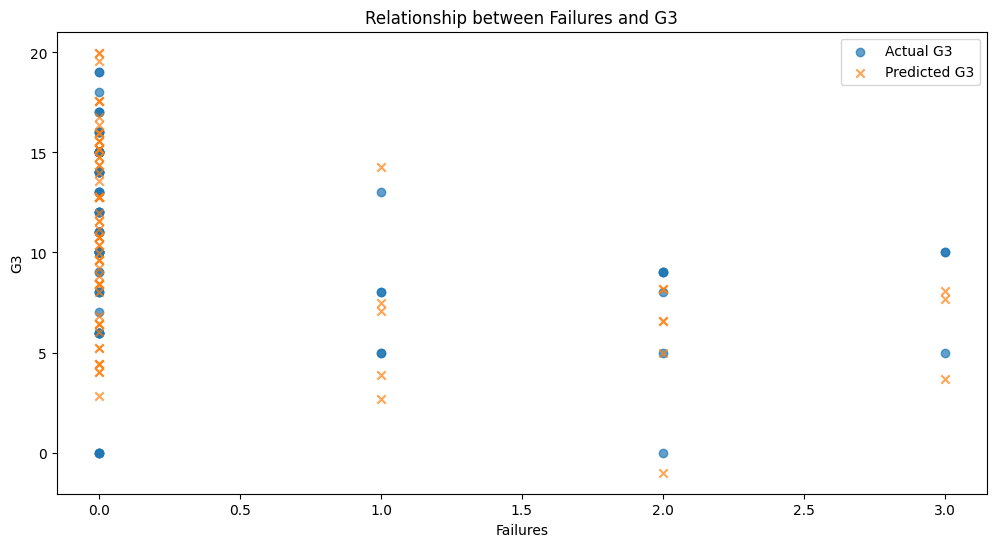

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['failures', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'failures']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Failures': df.loc[X_test.index, 'failures'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Failures'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Failures'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Failures')
plt.ylabel('G3')
plt.title('Relationship between Failures and G3')
plt.legend()
plt.show()
